## Military Power for the top 20 Countries of World!

In [280]:
import pandas
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
plt.style.use('seaborn')

#Getting the webpage
webpage_url = requests.get("https://en.wikipedia.org/wiki/Military").text

# Get the soup from webpage_url
soup = BeautifulSoup(webpage_url, 'lxml')
# print(soup.prettify())

my_table = soup.find("table", {"class": "wikitable sortable"})

table_body = my_table.find_all('tbody')


# Collect the data
ranking = []
countries = []
strength_scores = []
# active_duty = []
personnels = []
tanks = []
aircrafts = []
helicopters = []
carriers = []
submarines = []


for table in table_body:
    rows = table.find_all('tr')
    
    for row in rows:
        cells = row.find_all('td')
        
        if len(cells) > 2:
            rank = cells[0]
            ranking.append(int(rank.text))
            
            country = cells[1]
            countries.append(country.text.strip())
            
            strength_score = cells[2]
            strength_scores.append(float(strength_score.text))
            

            personnel = cells[3]
            personnels.append(float(personnel.text))
            
            tank = cells[4]
            tanks.append(float(tank.text))
            
            aircraft = cells[5]
            aircrafts.append(float(aircraft.text))
            
            helicopter = cells[6]
            helicopters.append(float(helicopter.text))
            
            carrier = cells[7]
            carriers.append(float(carrier.text.strip()))
            
            submarine = cells[8]
            submarines.append(float(submarine.text))
# Create a DataFrame

df = pd.DataFrame({
        "rank": ranking,
        "country": countries,
        "strength_scores": strength_scores,
        "personnel": personnels,
        "tanks": tanks,
        "aircrafts": aircrafts,
        "helicopters": helicopters,
        "carriers": carriers,
        "submarines": submarines })


In [281]:
print(df)

    rank         country  strength_scores  personnel  tanks  aircrafts  \
0      1   United States             0.94       0.90   0.86       0.95   
1      2          Russia             0.80       0.81   0.95       0.90   
2      3           China             0.79       0.95   0.90       0.86   
3      4           Japan             0.72       0.38   0.38       0.76   
4      5           India             0.69       0.86   0.81       0.81   
5      6          France             0.61       0.33   0.24       0.67   
6      7     South Korea             0.52       0.76   0.57       0.71   
7      8           Italy             0.52       0.52   0.33       0.38   
8      9  United Kingdom             0.50       0.19   0.14       0.52   
9     10          Turkey             0.47       0.57   0.67       0.57   
10    11        Pakistan             0.41       0.71   0.62       0.48   
11    12           Egypt             0.34       0.62   0.76       0.62   
12    13          Taiwan             0

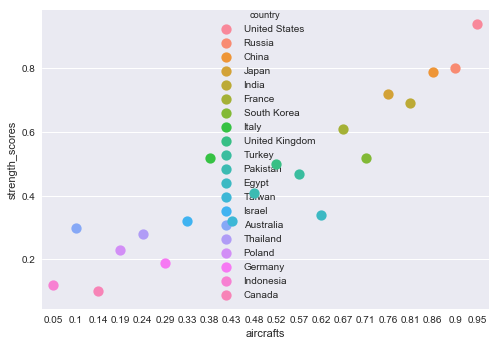

In [282]:

sns.pointplot(df['aircrafts'], df['strength_scores'], hue=df['country']);
fig.savefig('data/militarypowRanking.png')

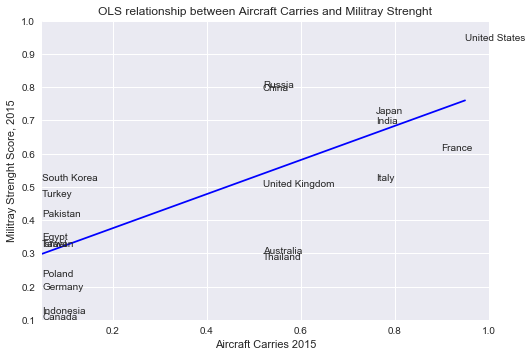

In [283]:
X = df['carriers']
y = df['strength_scores']
labels = df['country']

# Replace markers with country labels
fig, ax = plt.subplots()
ax.scatter(X, y, marker='')

for i, label in enumerate(labels): 
    ax.annotate(label, (X.iloc[i], y.iloc[i]))

# Fit a linear trend line
ax.plot(np.unique(X),
np.poly1d(np.polyfit(X, y, 1))(np.unique(X)), color='blue')


ax.set_xlim([0.05,1.0])
ax.set_ylim([0.1,1.0])
ax.set_xlabel('Aircraft Carries 2015')
ax.set_ylabel('Militray Strenght Score, 2015')
ax.set_title('OLS relationship between Aircraft Carries and Militray Strength')
fig.savefig('data/mplinearregression.png')
plt.show()
